In [ ]:
pip install opendatasets


In [ ]:
pip install pandas


In [ ]:
pip install kaggle

In [ ]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents")

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


In [ ]:
import os

# List files in the folder
files = os.listdir('us-accidents')
print(files)

['US_Accidents_March23.csv']


In [ ]:
import pandas as pd

dataset = pd.read_csv('us-accidents/US_Accidents_March23.csv', nrows=50000)

In [ ]:
print(dataset.columns)

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')


In [ ]:
print(dataset.head())

    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

In [ ]:
print(dataset.isnull().sum())  # Check for missing values

ID                           0
Source                       0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
End_Lat                  50000
End_Lng                  50000
Distance(mi)                 0
Description                  0
Street                       0
City                         0
County                       0
State                        0
Zipcode                      7
Country                      0
Timezone                     7
Airport_Code                 7
Weather_Timestamp          266
Temperature(F)             456
Wind_Chill(F)            47503
Humidity(%)                639
Pressure(in)               306
Visibility(mi)             526
Wind_Direction             267
Wind_Speed(mph)           8422
Precipitation(in)        46724
Weather_Condition          603
Amenity                      0
Bump                         0
Crossing                     0
Give_Way

In [ ]:
print(dataset.dtypes)

ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump      

In [ ]:
import pandas as pd
import numpy as np

columns_to_drop = [
    'End_Lat',    # 50000 missing
    'End_Lng',    # 50000 missing
    'Wind_Chill(F)',    # 47503 missing
    'Precipitation(in)'  # 46724 missing
]

dataset = pd.read_csv('us-accidents/US_Accidents_March23.csv', nrows=50000)

dataset = dataset.drop(columns=columns_to_drop)

def clean_dataset(df):
    # 1. Fill numeric columns with median
    numeric_columns = [
        'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
        'Visibility(mi)', 'Wind_Speed(mph)', 'Distance(mi)'
    ]
    for col in numeric_columns:
        df[col] = df[col].fillna(df[col].median())

    # 2. Fill categorical columns with mode
    categorical_columns = [
        'Wind_Direction', 'Weather_Condition', 'Zipcode',
        'Timezone', 'Airport_Code'
    ]
    for col in categorical_columns:
        df[col] = df[col].fillna(df[col].mode()[0])

    # 3. Convert timestamp columns to datetime
    df['Start_Time'] = pd.to_datetime(df['Start_Time'])
    df['End_Time'] = pd.to_datetime(df['End_Time'])
    df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'])

    df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'])
    df.loc[df['Weather_Timestamp'].isna(), 'Weather_Timestamp'] = df.loc[df['Weather_Timestamp'].isna(), 'Start_Time']

    return df

dataset = clean_dataset(dataset)

In [ ]:
print(dataset.isnull().sum())  # Check for missing values

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
T

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

In [ ]:
def prepare_data_for_clustering(df):

    numeric_features = [
        'Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)',
        'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
        'Visibility(mi)', 'Wind_Speed(mph)',
    ]

    X = df[numeric_features].copy()

    # Scale the features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    return X, numeric_features

# Prepare the data
X, feature_names = prepare_data_for_clustering(dataset)

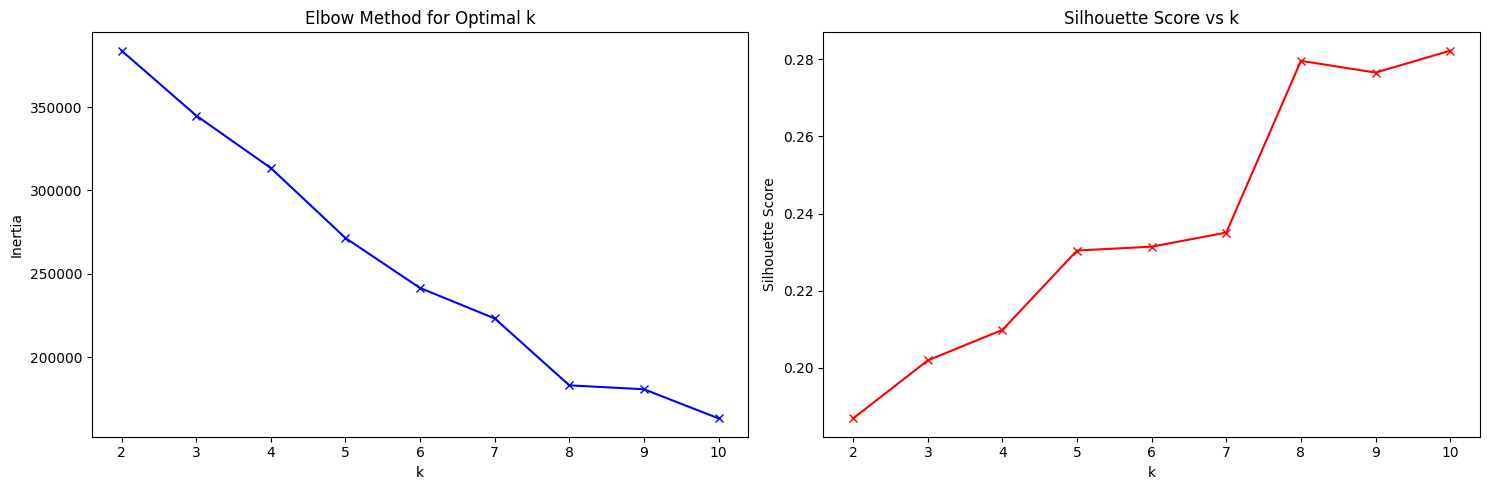

Optimal number of clusters (k): 10


In [ ]:
# K-Means Clustering

def kmeans_analysis(X, k_range=range(2, 11)):
    # Elbow method to find optimal k
    inertias = []
    silhouette_scores = []

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))

    # Plot elbow curve
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(k_range, inertias, 'bx-')
    ax1.set_xlabel('k')
    ax1.set_ylabel('Inertia')
    ax1.set_title('Elbow Method for Optimal k')

    ax2.plot(k_range, silhouette_scores, 'rx-')
    ax2.set_xlabel('k')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Silhouette Score vs k')

    plt.tight_layout()
    plt.show()

    # Choose optimal k and fit final model
    optimal_k = k_range[np.argmax(silhouette_scores)]
    print(f"Optimal number of clusters (k): {optimal_k}")

    final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    return final_kmeans.fit(X)

# Run K-Means analysis
kmeans_model = kmeans_analysis(X)

In [ ]:
# Standardize the dataset
dataset.drop(['Start_Time', 'End_Time', 'Weather_Timestamp'], axis=1, inplace=True)

scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset)
print(dataset.dtypes)


ValueError: could not convert string to float: 'A-1'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Drop only columns that are truly irrelevant
irrelevant_columns = ['ID', 'Source', 'Country', 'Airport_Code']
dataset_cleaned = dataset.drop(columns=irrelevant_columns)

# Process textual columns using TF-IDF (e.g., for 'Description')
tfidf = TfidfVectorizer(max_features=100)
description_vectors = tfidf.fit_transform(dataset['Description'].fillna('')).toarray()

# Add the processed 'Description' vectors back into the dataset
description_df = pd.DataFrame(description_vectors, columns=[f'desc_{i}' for i in range(description_vectors.shape[1])])
dataset_cleaned = pd.concat([dataset_cleaned, description_df], axis=1).drop(columns=['Description'])

# Label encode categorical columns
categorical_columns = [
    'State', 'Street', 'City', 'County', 'Timezone', 'Wind_Direction',
    'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
    'Astronomical_Twilight'
]

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    dataset_cleaned[col] = le.fit_transform(dataset_cleaned[col].astype(str))
    label_encoders[col] = le

# Convert datetime columns into numeric features
datetime_columns = ['Start_Time', 'End_Time', 'Weather_Timestamp']
for col in datetime_columns:
    dataset_cleaned[col + '_hour'] = pd.to_datetime(dataset[col]).dt.hour
    dataset_cleaned[col + '_day'] = pd.to_datetime(dataset[col]).dt.day
    dataset_cleaned[col + '_month'] = pd.to_datetime(dataset[col]).dt.month
    dataset_cleaned[col + '_year'] = pd.to_datetime(dataset[col]).dt.year

dataset_cleaned = dataset_cleaned.drop(columns=datetime_columns)

# Fill missing values for numerical columns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
numerical_columns = dataset_cleaned.select_dtypes(include=['float64', 'int64']).columns
dataset_cleaned[numerical_columns] = imputer.fit_transform(dataset_cleaned[numerical_columns])

# Ensure there are no NaN values left
dataset_cleaned = dataset_cleaned.fillna(0)

# The dataset is now preprocessed
print(dataset_cleaned.head())


KeyError: 'Start_Time'

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_timezone = LabelEncoder()
dataset_cleaned['Timezone'] = le_timezone.fit_transform(dataset_cleaned['Timezone'])


NameError: name 'dataset_cleaned' is not defined

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score
import pandas as pd
import numpy as np

cluster_range = range(2, 8)
print(f"Cluster Range: {cluster_range}")
models = []
db_scores = []
sil_scores = []

for num_clusters in cluster_range:
    clustering_model = AgglomerativeClustering(n_clusters=num_clusters, metric="euclidean")
    clustering_model.fit(dataset)
    cluster_labels = clustering_model.labels_
    models.append(clustering_model)

    db_scores.append(davies_bouldin_score(dataset, cluster_labels))
    sil_scores.append(silhouette_score(dataset, cluster_labels))
    print(f"Clusters: {num_clusters} | DB Score: {db_scores[-1]} | Silhouette Score: {sil_scores[-1]}")


Cluster Range: range(2, 8)


ValueError: could not convert string to float: 'A-1'

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Agglomerative Clustering Analysis
def agglomerative_analysis(X, k_range=range(2, 11), linkage='ward'):
    davies_bouldin_scores = []
    silhouette_scores = []

    for k in k_range:
        # Fit Agglomerative Clustering model
        model = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        labels = model.fit_predict(X)

        # Compute evaluation metrics
        davies_bouldin_scores.append(davies_bouldin_score(X, labels))
        silhouette_scores.append(silhouette_score(X, labels))

    # Plot the metrics
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(k_range, davies_bouldin_scores, 'bx-')
    ax1.set_xlabel('k')
    ax1.set_ylabel('Davies-Bouldin Score')
    ax1.set_title('Davies-Bouldin Score vs k')

    ax2.plot(k_range, silhouette_scores, 'rx-')
    ax2.set_xlabel('k')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Silhouette Score vs k')

    plt.tight_layout()
    plt.show()

    # Choose optimal k based on Silhouette Score
    optimal_k = k_range[np.argmax(silhouette_scores)]
    print(f"Optimal number of clusters (k): {optimal_k}")

    # Fit the final model with optimal k
    final_model = AgglomerativeClustering(n_clusters=optimal_k, linkage=linkage)
    return final_model.fit(X)

# Run Agglomerative Clustering analysis
agglomerative_model = agglomerative_analysis(X)


Estimated number of clusters: 5
Estimated number of noise points: 28
Silhouette Score for DBSCAN: 0.5778548217921979


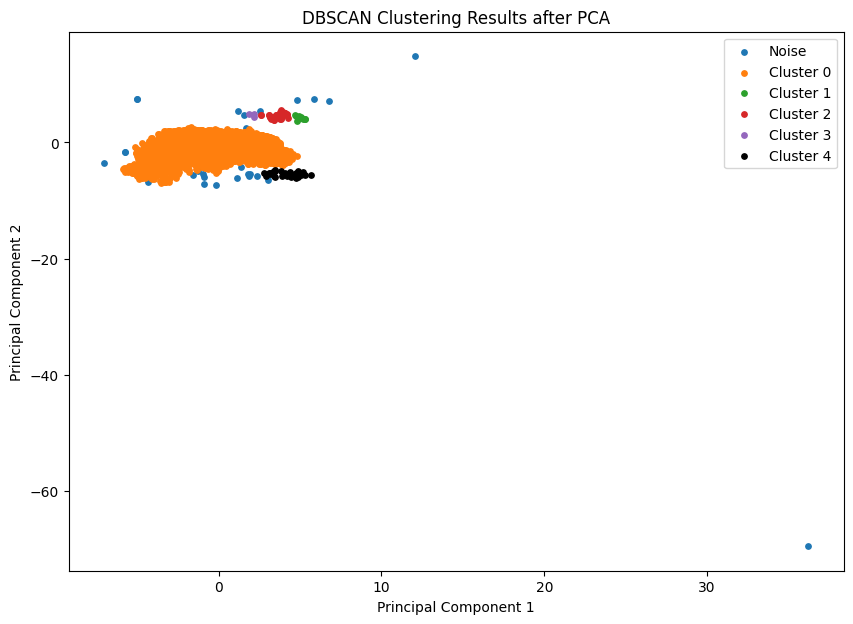

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)

dbscan_labels = dbscan.fit_predict(X_pca)

unique_labels = set(dbscan_labels)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

if len(unique_labels) > 1:
    silhouette_avg = silhouette_score(X_pca, dbscan_labels)
    print(f"Silhouette Score for DBSCAN: {silhouette_avg}")
else:
    print("Silhouette Score cannot be calculated for a single cluster.")

plt.figure(figsize=(10, 7))

unique_labels = sorted(unique_labels)
colors = [plt.cm.tab10(i) for i in range(len(unique_labels) - 1)] + [(0, 0, 0, 1)]
for cluster_id, color in zip(unique_labels, colors):
    if cluster_id == -1:
        plt.scatter(X_pca[dbscan_labels == cluster_id, 0], X_pca[dbscan_labels == cluster_id, 1],
                    c=[color], label='Noise', s=15)
    else:
        plt.scatter(X_pca[dbscan_labels == cluster_id, 0], X_pca[dbscan_labels == cluster_id, 1],
                    c=[color], label=f'Cluster {cluster_id}', s=15)

plt.title("DBSCAN Clustering Results after PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()
